In [ ]:
# Used https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html
# as reference and guide

In [8]:
%matplotlib inline
import mnist_reader
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import torch
import pandas as pd
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [9]:
class Data(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index,:],self.y[index]

    def __len__(self):
        return self.len

In [10]:

X_train, y_train = mnist_reader.load_mnist('', kind='train')
X_test, y_test = mnist_reader.load_mnist('', kind='t10k')

#split handle data sets
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()


#put into a loader
train_data = Data(X_train,y_train)
train_loader = DataLoader(train_data,batch_size=200)
test_data = Data(X_test,y_test)
test_loader = DataLoader(test_data,batch_size=200)

In [36]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.neural = nn.Sequential(
            nn.Unflatten(1,torch.Size([1,28,28])),
            nn.Conv2d(1,6,5,padding=2),
            nn.BatchNorm2d(6),
            nn.Tanh(),
            nn.MaxPool2d(2,stride=2),
            nn.Conv2d(6,16,5),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.MaxPool2d(2,stride=2),
            nn.Conv2d(16,120,5),
            nn.BatchNorm2d(120),
            nn.Tanh(),
            nn.Flatten(),
            nn.Linear(120,84),
            nn.Softmax(1)
        )

    def forward(self, x):
        x = self.neural(x)
        return x

In [37]:
net = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train_loss = []
training_accuracy = []
train_pred = []

epoch 0 started
epoch 1 started
epoch 2 started
epoch 3 started
epoch 4 started
epoch 5 started
epoch 6 started
epoch 7 started
epoch 8 started
epoch 9 started
epoch 10 started
epoch 11 started
epoch 12 started
epoch 13 started
epoch 14 started
epoch 15 started
epoch 16 started
epoch 17 started
epoch 18 started
epoch 19 started
epoch 20 started
epoch 21 started
epoch 22 started
epoch 23 started
epoch 24 started
Finished Training


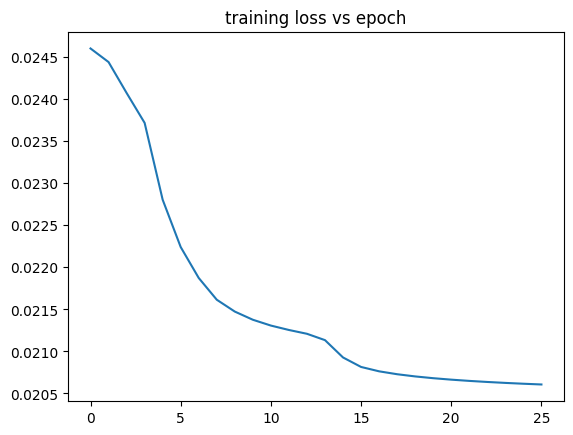

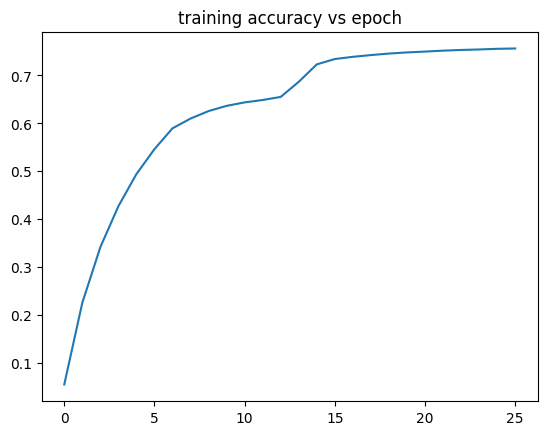

In [39]:
from sklearn.metrics import accuracy_score
for epoch in range(25):  # loop over the dataset multiple times
    print(f'epoch {epoch} started')
    train_pred = [] 
    running_loss = 0.0
    for x,y in train_loader:
        optimizer.zero_grad()
        outputs = net(x)
        train_pred.append(torch.max(outputs,1)[1].flatten())
        loss = criterion(outputs, y.long())
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss.append(running_loss/54000)
    running_loss = 0
    train_pred = [element for sublist in train_pred for element in sublist]
    training_accuracy.append(accuracy_score(y_train.detach().numpy(), train_pred))

print('Finished Training')
plt.plot(train_loss)
plt.title("training loss vs epoch")
plt.show()
plt.title("training accuracy vs epoch")
plt.plot(training_accuracy)
plt.show()

In [43]:
test_pred = []
for x,y in test_loader:
    outputs = net(x)
    labels = torch.max(outputs,1)[1]
    test_pred.append(labels.flatten())
test_pred = [element for sublist in test_pred for element in sublist]
print('--------------------------------------------------------')
print("Final accuracy of training set:", training_accuracy[len(training_accuracy)-1])
print('--------------------------------------------------------')
print("Accuracy of test set:", accuracy_score(y_test.detach().numpy(), test_pred))
print(test_pred)

--------------------------------------------------------
Final accuracy of training set: 0.75625
--------------------------------------------------------
Accuracy of test set: 0.7495
[tensor(9), tensor(2), tensor(1), tensor(1), tensor(2), tensor(1), tensor(2), tensor(2), tensor(5), tensor(7), tensor(2), tensor(5), tensor(5), tensor(3), tensor(2), tensor(1), tensor(2), tensor(2), tensor(8), tensor(0), tensor(2), tensor(7), tensor(7), tensor(5), tensor(1), tensor(2), tensor(2), tensor(0), tensor(9), tensor(3), tensor(8), tensor(8), tensor(3), tensor(3), tensor(8), tensor(0), tensor(7), tensor(5), tensor(7), tensor(9), tensor(0), tensor(1), tensor(3), tensor(9), tensor(2), tensor(7), tensor(2), tensor(1), tensor(2), tensor(2), tensor(2), tensor(2), tensor(5), tensor(8), tensor(2), tensor(2), tensor(8), tensor(2), tensor(8), tensor(0), tensor(7), tensor(7), tensor(8), tensor(5), tensor(1), tensor(1), tensor(0), tensor(3), tensor(7), tensor(8), tensor(7), tensor(0), tensor(2), tensor(0), te